<a href="https://colab.research.google.com/github/owenfab/IDS/blob/main/HW3/fabulaIDS_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IDS Homework 3
##Owen Fabula

##Part 1: SQL
###Data cleansing
Before I could perform any operations on the dataset, I first had to convert the original CSV file into SQL. For this, I used the online CSV to SQL converter, which resulted in the following schema:
<pre><code>
CREATE TABLE LifeExpectancy(
  Country                VARCHAR(52),
  Year                   INTEGER,
  Life_Expectancy        NUMERIC(4,1),
  Adult_Mortality        INTEGER,
  Alcohol                NUMERIC(5,2),
  Percentage_Expenditure NUMERIC(14,9),
  BMI                    NUMERIC(4,1),
  Total_Expenditure      NUMERIC(5,2),
  GDP                    NUMERIC(13,7),
  Population             NUMERIC(12,2),
  Schooling              NUMERIC(4,1)
);<br />
</code></pre>
I then copy/pasted the generated SQL into the online SQL editor (along with all the insert statements) and was ready to work with the data.<br /><br />
First, I wanted to see how many countries were in the table before any sort of data sanitization, so I used the following query:
<pre><code>
select count(distinct Country) as "Number of countries", count(Country) as "Number of Columns"
from LifeExpectancy;<br />
</code></pre>
From this query, I saw that there were 193 countries and 1108 columms in the unsanitized data set.
<pre><code>
Number of countries	Number of Columns
193	                1108<br />
</code></pre>
To delete all rows with population = 0, I used the following SQL query:
<pre><code>
delete from LifeExpectancy
where Population is NULL or Population = 0;<br />
</code></pre>
This eliminated countries like Antigua and Barbuda from the data set because their entries always had value NULL for their populations, and to verify that I had done it correctly, I used this query:
<pre><code>
select count(*)
from LifeExpectancy
where Population is NULL or Population = 0;<br />
</code></pre>
This query resulted in the following, indicating that I had done performed the cleansing correctly:
<pre><code>
count(*)
0<br />
</code></pre>
For other data cleansing, I wanted to see which other columns had null values so that I could cleanse those columns too. To do this, I used the following SQL queries:
<pre><code>
select count(*) as "Life_Expectancy"
from LifeExpectancy
where Life_Expectancy is null;

select count(*) as "Adult_Mortality"
from LifeExpectancy
where Adult_Mortality is null;

select count(*) as "Alcohol"
from LifeExpectancy
where Alcohol is null;

select count(*) as "Percentage_Expenditure"
from LifeExpectancy
where Percentage_Expenditure is null;

select count(*) as "BMI"
from LifeExpectancy
where BMI is null;

select count(*) as "Total_Expenditure"
from LifeExpectancy
where Total_Expenditure is null;

select count(*) as "GDP"
from LifeExpectancy
where GDP is null;

select count(*) as "Schooling"
from LifeExpectancy
where Schooling is null;<br />
</code></pre>
The queries produced the following results:
<pre><code>
Life_Expectancy
2
Adult_Mortality
2
Alcohol
145
Percentage_Expenditure
0
BMI
12
Total_Expenditure
142
GDP
7
Schooling
0<br />
</pre></code>
So, in order to rectify the null values, I decided to impute by the mean in each of the above columns that had null values. To impute by the mean, I used the following SQL commands:
<pre><code>
update LifeExpectancy
set Life_Expectancy = (select avg(Life_Expectancy) from LifeExpectancy)
where Life_Expectancy is null;

update LifeExpectancy
set Adult_Mortality = (select avg(Adult_Mortality) from LifeExpectancy)
where Adult_Mortality is null;

update LifeExpectancy
set Alcohol = (select avg(Alcohol) from LifeExpectancy)
where Alcohol is null;

update LifeExpectancy
set BMI = (select avg(BMI) from LifeExpectancy)
where BMI is null;

update LifeExpectancy
set Total_Expenditure = (select avg(Total_Expenditure) from LifeExpectancy)
where Total_Expenditure is null;

update LifeExpectancy
set GDP = (select avg(GDP) from LifeExpectancy)
where GDP is null;<br />
</code></pre>
Then, to check that the commands had worked correctly, I reran the queries that counted the amount of null values and got the following result, so I knew that I had correctly imputed by the mean.
<pre><code>
Life_Expectancy
0
Adult_Mortality
0
Alcohol
0
Percentage_Expenditure
0
BMI
0
Total_Expenditure
0
GDP
0
Schooling
0<br />
</code></pre>
I then wrote several queries that would calculate the z-score of each value in a given column to determine if there were any outliers (i.e., z-score >= 3 or <= -3) in any column.
<pre><code>
select count(*) as "Life_Expectancy <= -3"
from LifeExpectancy
where ((Life_Expectancy - (select avg(Life_Expectancy) from LifeExpectancy)) / (select stdev(Life_Expectancy) from LifeExpectancy)) <= -3;

select count(*) as "Life_Expectancy >= 3"
from LifeExpectancy
where ((Life_Expectancy - (select avg(Life_Expectancy) from LifeExpectancy)) / (select stdev(Life_Expectancy) from LifeExpectancy)) >= 3;

select count(*) as "Adult_Mortality <= -3"
from LifeExpectancy
where ((Adult_Mortality - (select avg(Adult_Mortality) from LifeExpectancy)) / (select stdev(Adult_Mortality) from LifeExpectancy)) <= -3;

select count(*) as "Adult_Mortality >= 3"
from LifeExpectancy
where ((Adult_Mortality - (select avg(Adult_Mortality) from LifeExpectancy)) / (select stdev(Adult_Mortality) from LifeExpectancy)) >= 3;

select count(*) as "Alcohol <= -3"
from LifeExpectancy
where ((Alcohol - (select avg(Alcohol) from LifeExpectancy)) / (select stdev(Alcohol) from LifeExpectancy)) <= -3;

select count(*) as "Alcohol >= 3"
from LifeExpectancy
where ((Alcohol - (select avg(Alcohol) from LifeExpectancy)) / (select stdev(Alcohol) from LifeExpectancy)) >= 3;

select count(*) as "Percentage_Expenditure <= -3"
from LifeExpectancy
where ((Percentage_Expenditure - (select avg(Percentage_Expenditure) from LifeExpectancy)) / (select stdev(Percentage_Expenditure) from LifeExpectancy)) <= -3;

select count(*) as "Percentage_Expenditure >= 3"
from LifeExpectancy
where ((Percentage_Expenditure - (select avg(Percentage_Expenditure) from LifeExpectancy)) / (select stdev(Percentage_Expenditure) from LifeExpectancy)) >= 3;

select count(*) as "BMI <= -3"
from LifeExpectancy
where ((BMI - (select avg(BMI) from LifeExpectancy)) / (select stdev(BMI) from LifeExpectancy)) <= -3;

select count(*) as "BMI >= 3"
from LifeExpectancy
where ((BMI - (select avg(BMI) from LifeExpectancy)) / (select stdev(BMI) from LifeExpectancy)) >= 3;

select count(*) as "TOTAL_EXPENDITURE <= -3"
from LifeExpectancy
where ((TOTAL_EXPENDITURE - (select avg(TOTAL_EXPENDITURE) from LifeExpectancy)) / (select stdev(TOTAL_EXPENDITURE) from LifeExpectancy)) <= -3;

select count(*) as "TOTAL_EXPENDITURE >= 3"
from LifeExpectancy
where ((TOTAL_EXPENDITURE - (select avg(TOTAL_EXPENDITURE) from LifeExpectancy)) / (select stdev(TOTAL_EXPENDITURE) from LifeExpectancy)) >= 3;

select count(*) as "GDP <= -3"
from LifeExpectancy
where ((GDP - (select avg(GDP) from LifeExpectancy)) / (select stdev(GDP) from LifeExpectancy)) <= -3;

select count(*) as "GDP >= 3"
from LifeExpectancy
where ((GDP - (select avg(GDP) from LifeExpectancy)) / (select stdev(GDP) from LifeExpectancy)) >= 3;

select count(*) as "SCHOOLING <= -3"
from LifeExpectancy
where ((SCHOOLING - (select avg(SCHOOLING) from LifeExpectancy)) / (select stdev(SCHOOLING) from LifeExpectancy)) <= -3;

select count(*) as "SCHOOLING >= 3"
from LifeExpectancy
where ((SCHOOLING - (select avg(SCHOOLING) from LifeExpectancy)) / (select stdev(SCHOOLING) from LifeExpectancy)) >= 3;<br />
</code></pre>
From that query, I received the following results:
<pre><code>
Life_Expectancy <= -3
1
Life_Expectancy >= 3
0
Adult_Mortality <= -3
0
Adult_Mortality >= 3
6
Alcohol <= -3
0
Alcohol >= 3
2
Percentage_Expenditure <= -3
0
Percentage_Expenditure >= 3
25
BMI <= -3
0
BMI >= 3
0
TOTAL_EXPENDITURE <= -3
0
TOTAL_EXPENDITURE >= 3
2
GDP <= -3
0
GDP >= 3
24
SCHOOLING <= -3
2
SCHOOLING >= 3
0<br />
</code></pre>
From this, I knew that I had to impute by the mean for outliers in the following columns: Life_Expectancy, Adult_Morality, Alcohol, Percentage_Expenditure, Total_Expenditure, GDP, and Schooling. The following SQL queries achieved that:
<pre><code>
update LifeExpectancy
set Life_Expectancy = (select avg(Life_Expectancy) from LifeExpectancy)
where ((Life_Expectancy - (select avg(Life_Expectancy) from LifeExpectancy)) / (select stdev(Life_Expectancy) from LifeExpectancy)) <= -3;

update LifeExpectancy
set Adult_Mortality = (select avg(Adult_Mortality) from LifeExpectancy)
where ((Adult_Mortality - (select avg(Adult_Mortality) from LifeExpectancy)) / (select stdev(Adult_Mortality) from LifeExpectancy)) >= 3;

update LifeExpectancy
set Alcohol = (select avg(Alcohol) from LifeExpectancy)
where ((Alcohol - (select avg(Alcohol) from LifeExpectancy)) / (select stdev(Alcohol) from LifeExpectancy)) >= 3;

update LifeExpectancy
set Percentage_Expenditure = (select avg(Percentage_Expenditure) from LifeExpectancy)
where ((Percentage_Expenditure - (select avg(Percentage_Expenditure) from LifeExpectancy)) / (select stdev(Percentage_Expenditure) from LifeExpectancy)) >= 3;

update LifeExpectancy
set Total_Expenditure = (select avg(Total_Expenditure) from LifeExpectancy)
where ((TOTAL_EXPENDITURE - (select avg(TOTAL_EXPENDITURE) from LifeExpectancy)) / (select stdev(TOTAL_EXPENDITURE) from LifeExpectancy)) >= 3;

update LifeExpectancy
set GDP = (select avg(GDP) from LifeExpectancy)
where ((GDP - (select avg(GDP) from LifeExpectancy)) / (select stdev(GDP) from LifeExpectancy)) >= 3;

update LifeExpectancy
set Schooling = (select avg(Schooling) from LifeExpectancy)
where ((SCHOOLING - (select avg(SCHOOLING) from LifeExpectancy)) / (select stdev(SCHOOLING) from LifeExpectancy)) <= -3;<br />
</code></pre>
###Amount of countries after cleansing
After cleansing, I used the following SQL query to determine the amount of remaining countries:
<pre><code>
select count(distinct Country) as "Number of countries", count(Country) as "Number of Columns"
from LifeExpectancy;<br />
</code></pre>
I got the following result, meaning that there are 145 remaining countries and 856 total columns.
<pre><code>
Number of countries	Number of Columns
145	                856<br />
</code></pre>

###Countries with Highest and Lowest Average Mortality Rates (2010-2015)
In order to find the top 5 countries with the highest average mortality rate, I used the following SQL query:
<pre><code>
select Country, avg(Adult_Mortality) as "Avg Mortality"
from LifeExpectancy
group by Country
order by "Avg Mortality" desc limit 5;<br />
</code></pre>
The query returned the following result:
<pre><code>
Country	                  Avg Mortality
Central African Republic	 435.5
Swaziland	                409.5
Nigeria	                  366
Chad	                     363.3333333333333
Sierra Leone	             362.6666666666667<br />
</code></pre>
This means that the country with the highest average mortality rate from 2010 to 2015 (in this data set) was the Central African Republic with 435.5<br /><br />
In order to find the 5 countries with the lowest average mortality rate, I used the following SQL query:
<pre><code>
select Country, avg(Adult_Mortality) as "Avg Mortality"
from LifeExpectancy
group by Country
order by "Avg Mortality" asc limit 5;<br />
</code></pre>
The query returned the following result:
<pre><code>
Country	    Avg Mortality
Tunisia	    10.666666666666666
Italy	      31.5
Iceland	    35.333333333333336
Israel	     42.166666666666664
Montenegro	 48.5<br />
</code></pre>
This means that the country with the lowest average mortality rate from 2010 to 2015 (in this data set) was Tunisia with 10.67


###Countries with Highest and Lowest Average Population (2010-2015)
In order to find the top 5 highest populations in the data set, I used the following SQL query:
<pre><code>
select Country, avg(Population) as "Population"
from LifeExpectancy
group by Country
order by "Population" desc limit 5;<br />
</code></pre>
The query produced the following result:
<pre><code>
Country	   Population
India	     281099848.5
Indonesia	 175751726.33333334
Pakistan	  123341557.5
Nigeria	   90382108.33333333
Brazil	    70799653.83333333<br />
</code></pre>
From this, one can see that India had the highest average population from 2010-2015.<br /><br />
To find the top 5 lowest populations in the data set, I used the following SQL query:
<pre><code>
select Country, avg(Population) as "Population"
from LifeExpectancy
group by Country
order by "Population" asc limit 5;<br />
</code></pre>
The query produced the following results:
<pre><code>
Country	   Population
Palau	     292
Tuvalu	    1819
Sri Lanka	 2522.8333333333335
Maldives	  8454.333333333334
Georgia	   9383.333333333334<br />
</code></pre>
From this, one can see that Palau has the lowest average population from 2010-2015.

###Countries with Highest and Lowest Average GDP (2010-2015)
In order to find the top 5 countries with the highest GDP (2010-2015), I used the following SQL query:
<pre><code>
select Country, avg(GDP) as "GDP"
from LifeExpectancy
group by Country
order by "GDP" desc limit 5;<br />
</code></pre>
The above query produced the following results:
<pre><code>
Country	    GDP
Austria	    40276.874234999996
Israel	     29932.439365
Netherlands	27294.377801489376
Finland	    26069.414426666666
Italy	      24713.54498333333<br />
</code></pre>
This shows that, in this data set, Austria had the highest average GDP from 2010-2015 with 40276.87<br /><br />
To find the lowest 5 countries by GDP, I used the following SQL query:
<pre><code>
select Country, avg(GDP) as "GDP"
from LifeExpectancy
group by Country
order by "GDP" asc limit 5;<br />
</code></pre>
The above query produced the following results:
<pre><code>
Country	    GDP
Senegal	    94.40303758333334
Burundi	    192.02427953333336
Sierra Leone   298.3913750666667
Niger	      322.34020160000006
Guinea	     353.5075783666666<br />
</code></pre>
From this, one can see that from 2010-2015, Senegal had the lowest average GDP with 94.40


###Countries with the Highest and Lowest Average Schooling Years (2010-2015)
To find the top 5 highest average schooling years for the data set, I used the following SQL query:
<pre><code>
select Country, avg(Schooling) as "Schooling"
from LifeExpectancy
group by Country
order by "Schooling" desc limit 5;<br />
</code></pre>
The query produced this result:
<pre><code>
Country	    Schooling
Australia	  20.083333333333332
Iceland	    18.783333333333335
Ireland	    18.5
Denmark	    18.2
Netherlands	17.766666666666666<br />
</code></pre>
From the results, one can see that Australia had the highest average years of schooling from 2010-2015 with 20.08 years.<br /><br />
In order to find the top 5 lowest average schooling years for the data set, I used the following SQL query:
<pre><code>
select Country, avg(Schooling) as "Schooling"
from LifeExpectancy
group by Country
order by "Schooling" asc limit 5;<br />
</code></pre>
The query produced the following result:
<pre><code>
Country	                  Schooling
Eritrea	                  5.05
Niger	                    5.066666666666666
Djibouti	                 6.1000000000000005
South Sudan	              6.185767133956385
Central African Republic	 6.966666666666668<br />
</code></pre>
From this, one can see that, in the data set, Eritrea had the lowest average schooling years with 5.05 years.

###Countries with the Highest and Lowest Average Alcohol Consumption (2010-2015)
To find the top 5 highest alcohol consumption rates for the data set, I used the following SQL query:
<pre><code>
select Country, avg(Alcohol) as "Alcohol Rates"
from LifeExpectancy
group by Country
order by "Alcohol Rates" desc limit 5;<br />
</code></pre>
The query produced the following result:
<pre><code>
Country	  Alcohol Rates
Lithuania	12.538757618377877
Austria	  10.807090951711208
Croatia	  10.768757618377876
France	   10.31709095171121
Bulgaria	 10.142090951711209<br />
</code></pre>
From this, one can see that Lithuania had the highest average alcohol consumption rate from 2010-2015 with 12.54<br /><br />
To find the top 5 lowest alcohol consumption rates, I used the following SQL query:
<pre><code>
select Country, avg(Alcohol) as "Alcohol Rates"
from LifeExpectancy
group by Country
order by "Alcohol Rates" asc limit 5;<br />
</code></pre>
The query produced the following result:
<pre><code>
Country	    Alcohol Rates
Afghanistan	0.01
Tuvalu	     0.01
Eritrea	    0.615
Bangladesh	 0.7254242850445417
Mauritania	 0.7254242850445417<br />
</code></pre>
From this, one can see that the country with the lowest average alcohol consumption rate in this data set is Afghanistan.

###Do densely populated countries tend to have lower life expectancy?
In order to understand the relationship between population density and life expectancy, I used the following SQL queries:
<pre><code>
select Country, Life_Expectancy as "Life Expectancy", avg(Population) as "Population"
from LifeExpectancy
group by Country
order by "Population" desc limit 10;

select Country, Life_Expectancy as "Life Expectancy", avg(Population) as "Population"
from LifeExpectancy
group by Country
order by "Population" asc limit 10;<br />
</code></pre>
Both queries essentially find the average population and life expectancy from 2010-2015 for each country; the first query sorts the results by population, descending, and the second query sorts the results by population, ascending, so that I could see how lower and higher population densities may relate to life expectancy. The queries returned the following results:
<pre><code>
<strong>FIRST QUERY RESULTS:</strong>
Country	            Life Expectancy	    Population
India	              66.4	                281099848.5
Indonesia	          68.1	                175751726.33333334
Pakistan	           65.1	                123341557.5
Nigeria                52	                  90382108.33333333
Brazil	             73.8	                70799653.83333333
Bangladesh	         69.9	                59971506.333333336
Russian Federation	 68.4	                55182376.166666664
Turkey	             74.2	                51513111.5
Ethiopia	           61.8	                49418339.5
Mexico	             75.6	                42514971.5
<strong>SECOND QUERY RESULTS:</strong>
Country	            Life Expectancy	    Population
Palau	              70.53782201405157	   292
Tuvalu	             70.53782201405157	   1819
Sri Lanka	          74.5	                2522.8333333333335
Maldives	           76.7	                8454.333333333334
Georgia	            73.8	                9383.333333333334
Kiribati	           65.3	                14193.5
Tonga	              72.8	                15189.833333333334
Israel	             81.7	                43490.333333333336
Seychelles	         72.4	                63329.666666666664
Samoa	              72.6	                104704.83333333333<br />
</code></pre>
From these results, one can see that there is at least some degree of a negative correlation between population density and life expectancy (i.e., as population density goes up, life expectancy goes down); the least population-dense countries in the data set have a highest life expectancy than those life expectancies of the most population-dense countries.


##Part 2: Python
###Importing the data
In order to import the data set to Python, I used the URL of the raw CSV file, found on GitHub and placed the contents of the data set into a pandas data frame

In [113]:
#importing the libraries needed for data frames and regression
import pandas as pd
pd.options.mode.chained_assignment = None  #check references section; I did this to turn off a warning that was appearing after imputing by the mean to fill null values
import numpy as np
import matplotlib.pyplot as mpl

In [114]:
#creating data frame from raw csv
#get url of raw csv from GitHub and load csv content into data frame (see references for pandas documentation for read_csv, which is where I found the function)
leDF = pd.read_csv("https://raw.githubusercontent.com/bforoura/IDS/main/HW3/Life_Expectancy.csv", sep=",")
#print data frame to make sure data was properly imported
leDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.01,79.679367,16.7,9.20,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.01,7.097109,17.2,7.87,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.01,78.184215,17.6,8.52,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.01,73.219243,18.1,8.13,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.01,73.523582,18.6,8.18,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.00,63.750530,29.9,6.31,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.09,92.602336,3.3,6.69,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.39,10.666707,3.8,6.88,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.50,10.822595,31.3,6.44,127.474620,15411675.0,10.3


##Data cleansing
I have cleansed the data set in Python in the same way that I did it in SQL, meaning that I deleted all rows with a population set to null or zero, imputed all other null values by the mean, and imputed all outliers by the mean. The following code performs those cleansing procedures.

In [115]:
#drop all countries with population = 0 or population = null (see references for pandas documentation)
leDF = leDF.dropna(subset="Population")

In [116]:
#impute missing values in all other columns
leDF.iloc[:,2] = leDF.iloc[:,2].fillna(leDF.iloc[:,2].mean())
leDF.iloc[:,3] = leDF.iloc[:,3].fillna(leDF.iloc[:,3].mean())
leDF.iloc[:,4] = leDF.iloc[:,4].fillna(leDF.iloc[:,4].mean())
leDF.iloc[:,5] = leDF.iloc[:,5].fillna(leDF.iloc[:,5].mean())
leDF.iloc[:,6] = leDF.iloc[:,6].fillna(leDF.iloc[:,6].mean())
leDF.iloc[:,7] = leDF.iloc[:,7].fillna(leDF.iloc[:,7].mean())
leDF.iloc[:,8] = leDF.iloc[:,8].fillna(leDF.iloc[:,8].mean())
leDF.iloc[:,10] = leDF.iloc[:,10].fillna(leDF.iloc[:,10].mean())
leDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 856 entries, 0 to 1107
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 856 non-null    object 
 1   Year                    856 non-null    int64  
 2   Life_Expectancy         856 non-null    float64
 3   Adult_Mortality         856 non-null    float64
 4   Alcohol                 856 non-null    float64
 5   Percentage_Expenditure  856 non-null    float64
 6    BMI                    856 non-null    float64
 7   Total_Expenditure       856 non-null    float64
 8   GDP                     856 non-null    float64
 9   Population              856 non-null    float64
 10  Schooling               856 non-null    float64
dtypes: float64(9), int64(1), object(1)
memory usage: 80.2+ KB


In [117]:
#impute outliers
colPosition = 2
for i in leDF.columns:
  if (i == 'Country' or i == 'Year'):
    continue
  #find mean and stdev
  mean = leDF[i].mean()
  stdev = leDF[i].std()
  #calculate z-score for each value in a column
  rowPosition = 0
  for j in leDF[i]:
    if ((j - mean) / stdev >= 3 or (j - mean) / stdev <= -3):
      #if z-score of individual value is >= 3 or <= -3 (outlier), impute by mean
      leDF.iloc[rowPosition, colPosition] = leDF[i].mean()
    rowPosition = rowPosition + 1
  colPosition = colPosition + 1
#print data frame
leDF

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279.0,0.010000,79.679367,16.7,9.200000,553.328940,2883167.0,9.2
1,Afghanistan,2011,59.2,275.0,0.010000,7.097109,17.2,7.870000,63.537231,2978599.0,9.5
2,Afghanistan,2012,59.5,272.0,0.010000,78.184215,17.6,8.520000,669.959000,3696958.0,9.8
3,Afghanistan,2013,59.9,268.0,0.010000,73.219243,18.1,8.130000,631.744976,31731688.0,9.9
4,Afghanistan,2014,59.9,271.0,0.010000,73.523582,18.6,8.180000,612.696514,327582.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...
1103,Zimbabwe,2011,54.9,464.0,6.000000,63.750530,29.9,6.310000,839.927936,14386649.0,10.1
1104,Zimbabwe,2012,56.6,429.0,6.090000,92.602336,3.3,6.690000,955.648466,1471826.0,9.8
1105,Zimbabwe,2013,58.0,399.0,6.390000,10.666707,3.8,6.880000,111.227396,155456.0,10.4
1106,Zimbabwe,2014,59.2,371.0,6.500000,10.822595,31.3,6.440000,127.474620,15411675.0,10.3


###How does the Adult Mortality Rate affect Life Expectancy?
To find the correlation between adult mortality rate and life expectancy, I used numpy to calulcate the correlation matrix between the Adult_Mortality column and the Life_Expectancy column

In [118]:
print(np.corrcoef(leDF["Adult_Mortality"], leDF["Life_Expectancy "]))

[[ 1.         -0.72646461]
 [-0.72646461  1.        ]]


From the above code, one can see that the Pearson r value between Adult Mortality and Life Expectancy is -0.72282189; as such, there is a relatively strong negative correlation between the adult mortality rate and life expectancy, meaning that as the adult mortality rate rises, life expectancy goes down. This makes sense, as a higher death rate among adults will lower life expectancy.

###More correlation analysis
To find out what kind of correlation life expectancy has with eating habits, alcohol consumption habits, and social and economic factors, I used the following code:

In [120]:
#eating habits
print("Correlation between Eating Habits (BMI) and Life Expectancy:\n", np.corrcoef(leDF[" BMI "], leDF["Life_Expectancy "]))
print("\nCorrelation between Alcohol Consumption and Life Expectancy:\n", np.corrcoef(leDF["Alcohol"], leDF["Life_Expectancy "]))
print("\nCorrelation between Social Factors (Population) and Life Expectancy:\n", np.corrcoef(leDF["Population"], leDF["Life_Expectancy "]))
print("\nEconomic Factors (Expenditure) and Life Epectancy:")
print("Correlation between Percentage_Expenditure and Life Expectancy:\n", np.corrcoef(leDF["Percentage_Expenditure"], leDF['Life_Expectancy ']))
print("\nCorrelation between Total_Expenditure and Life Expectancy:\n", np.corrcoef(leDF["Total_Expenditure"], leDF['Life_Expectancy ']))

Correlation between Eating Habits (BMI) and Life Expectancy:
 [[1.        0.5273622]
 [0.5273622 1.       ]]

Correlation between Alcohol Consumption and Life Expectancy:
 [[1.         0.44659503]
 [0.44659503 1.        ]]

Correlation between Social Factors (Population) and Life Expectancy:
 [[ 1.         -0.02912889]
 [-0.02912889  1.        ]]

Economic Factors (Expenditure) and Life Epectancy:
Correlation between Percentage_Expenditure and Life Expectancy:
 [[1.         0.41581636]
 [0.41581636 1.        ]]

Correlation between Total_Expenditure and Life Expectancy:
 [[1.         0.24360081]
 [0.24360081 1.        ]]


From the above results, one can see that there is a positive relationship between eating habits (i.e., BMI) and Life Expectancy, but that that positive relationship is not incredibly strong.<br />One can also see that there is a weaker positive correlation between alcohol consumption and life expectancy. <br />There is also a weak negative relationship between population and life expectancy.<br />Finally, one can see that for both percentage expenditure and total expenditure, there exists a weak positive relationship.

###Impact of schooling on life expectancy
To find the nature of the correlation between years of schooling and life expectancy, I used the following code:

In [121]:
print(np.corrcoef(leDF["Schooling"], leDF["Life_Expectancy "]))

[[1.         0.80451131]
 [0.80451131 1.        ]]


From the above code output, one can see that the correlation coefficient between schooling and life expectancy is ~0.804, meaning that there is a strong postive correlation between years in schooling and life expectancy in this data set.

##Creating and Plotting Linear Regression Models
There were strong correlations the following independent variables and life expectancy: adult mortality, BMI, and schooling. As such, I decided to create linear regression models between these three independent variables and life expectancy. To do this, I used the following code:

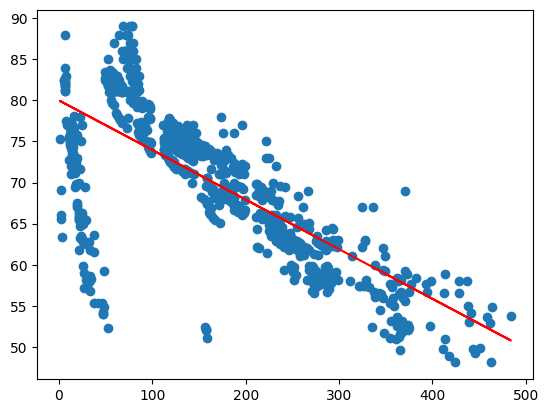


ANALYSIS:
Linear regression model equation:  l_e_prediction = [[-0.06037437]] x + [80.00423905]
MSE:  36.60399536922419
R2:  0.5277508227307608


In [122]:
#linear regression for adult mortality and life expectancy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#getting columns from data frame into arrays
a_m = leDF.iloc[:, 3].values.reshape(-1,1)
l_e = leDF.iloc[:, 2].values.reshape(-1,1)

#create the model
LRmodel_am = LinearRegression()

#perform linear regression
LRmodel_am.fit(a_m, l_e)

#predictions
l_e_predictions = LRmodel_am.predict(a_m)

#plot everything:
mpl.scatter(a_m, l_e)
mpl.plot(a_m, l_e_predictions, color='red')
mpl.show()

print("\nANALYSIS:")
print("Linear regression model equation: ", "l_e_prediction =", LRmodel_am.coef_,"x +", LRmodel_am.intercept_)
print("MSE: ", mean_squared_error(l_e, l_e_predictions))
print("R2: ", r2_score(l_e, l_e_predictions))

From the above code output, one can see that the generated linear regression model between adult mortality and life expectancy performs well, but could definitely be better. Its R2 value is ~0.52, meaning that only ~52% of the variation or scatter of the dependent variable is explained by the adult mortality rate. Additionally, this model's MSE value is ~37, and since the most optimal value for MSE is 0 (i.e., no error at all), this model could definitely stand to be improved.

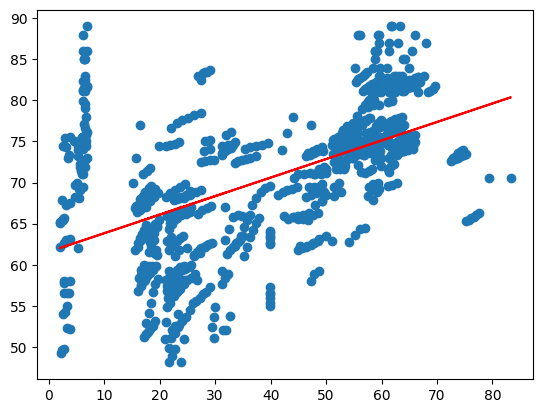


ANALYSIS:
Linear regression model equation:  l_e_prediction = [[0.22567513]] x + [61.57824807]
MSE:  55.953566181972704
R2:  0.27811089122437016


In [123]:
#linear regression for BMI and life expectancy

#getting columns from data frame into arrays
bmi_arr = leDF.iloc[:, 6].values.reshape(-1,1)
l_e = leDF.iloc[:, 2].values.reshape(-1,1)

#create the model
LRmodel_bmi = LinearRegression()

#perform linear regression
LRmodel_bmi.fit(bmi_arr, l_e)

#predictions
l_e_predictions = LRmodel_bmi.predict(bmi_arr)

#plot everything:
mpl.scatter(bmi_arr, l_e)
mpl.plot(bmi_arr, l_e_predictions, color='red')
mpl.show()

print("\nANALYSIS:")
print("Linear regression model equation: ", "l_e_prediction =", LRmodel_bmi.coef_,"x +", LRmodel_bmi.intercept_)
print("MSE: ", mean_squared_error(l_e, l_e_predictions))
print("R2: ", r2_score(l_e, l_e_predictions))

From the above code output, one can see that perhaps a linear regression model is not the best model for the relationship between BMI and life expectancy. First, this model's R2 value is ~0.278, meaning that only ~27.8% of the variance in the dependent variable is explained by the BMI; furthermore, this model's MSE value is ~56, which is far from the optimal 0.

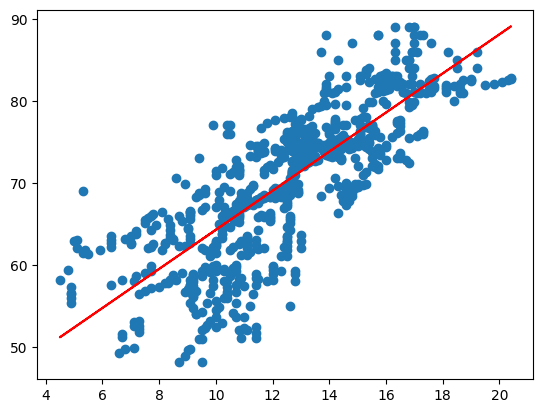


ANALYSIS:
Linear regression model equation:  l_e_prediction = [[2.38311625]] x + [40.44547504]
MSE:  27.342518818114463
R2:  0.6472384534509102


In [124]:
#linear regression for Schooling and life expectancy

#getting columns from data frame into arrays
school_arr = leDF.iloc[:, 10].values.reshape(-1,1)
l_e = leDF.iloc[:, 2].values.reshape(-1,1)

#create the model
LRmodel_school = LinearRegression()

#perform linear regression
LRmodel_school.fit(school_arr, l_e)

#predictions
l_e_predictions = LRmodel_school.predict(school_arr)

#plot everything:
mpl.scatter(school_arr, l_e)
mpl.plot(school_arr, l_e_predictions, color='red')
mpl.show()

print("\nANALYSIS:")
print("Linear regression model equation: ", "l_e_prediction =", LRmodel_school.coef_,"x +", LRmodel_school.intercept_)
print("MSE: ", mean_squared_error(l_e, l_e_predictions))
print("R2: ", r2_score(l_e, l_e_predictions))

Finally, one can see from the above code output that a linear regression model works quite well for modeling the relationship between years in school and life expectancy. This model's R2 value was ~0.65, meaning that ~65% of the variance in the dependent variable can be explained by the amount of years in schooling, a relatively good value that shows that there is indeed some kind of relationship between the dependent and independent variables. This model's MSE value was ~27.34, which is still imperfect but better than the other two models.

###Which model performed the best?
From all of the above analysis and data, it is clear that the linear regression model between schooling and life expectancy performed the best of the three displayed models. That model had the highest R2 value, meaning that schooling did the best in explaining the scatter of life expectancy; that model also had the lowest MSE value, meaning that its predicted values were the closest to the actual values in the data set. These factors contribute to the model between schooling and life expectancy being the most performant overall.

##References
pandas read_csv documentation: https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html <br />
pandas dropna documentation: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html